In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


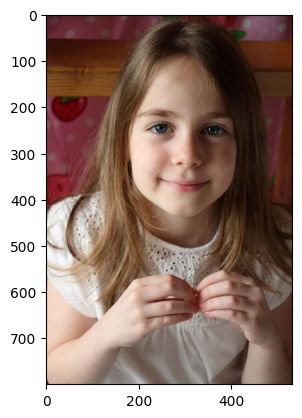

True

In [ ]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2

filepath = '/content/drive/MyDrive/kdt_240424/m8_vision/data/girl.png'
img = cv2.imread(filepath)
#plt.axis('off') # axis 출력끄기
# OpenCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # 이미지 출력

plt.show()

# 이미지 저장
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/girl1.png', img)

(800, 533, 3)
(500, 600, 3)


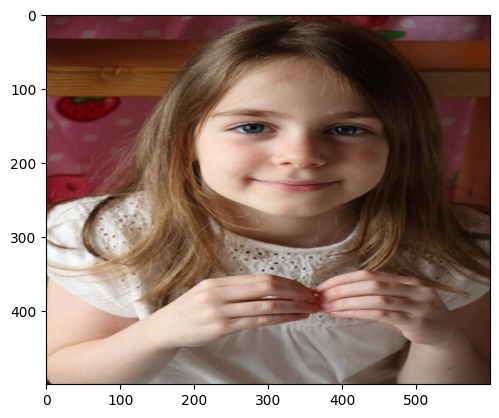

In [ ]:
import matplotlib.pyplot as plt
import cv2

filepath = '/content/drive/MyDrive/kdt_240424/m8_vision/data/girl1.png'
img = cv2.imread(filepath)
print(img.shape)

im2 = cv2.resize(img, (600,500)) # img, (width, heigh)
# 크기 변경한 이미지 저장
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/out_resize.png', im2)

# 이미지 출력
print(im2.shape)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

(800, 533, 3)


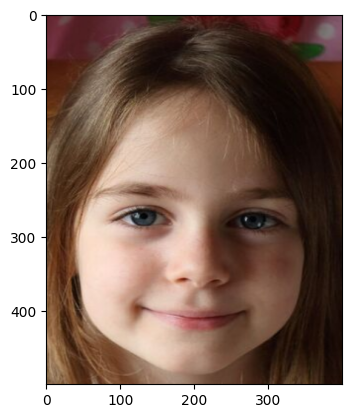

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

filepath = '/content/drive/MyDrive/kdt_240424/m8_vision/data/girl1.png'
img = cv2.imread(filepath)
print(img.shape)

# 이미지 자르기
im3 = img[0:450,150:450].copy()
# 이미지 크기 변경
im3 = cv2.resize(im3, (400,500))
# 크기 변경한 이미지 저장
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/cut_crop.png', im3)

# 이미지 출력
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.show()


[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]

https://github.com/opencv/opencv/tree/master/data/haarcascades


- 캐스케이드 파일은 컴퓨터 비전에서 객체 검출에 사용되는 파일로, 특히 Haar Cascade 분류기에 의해 사용됩니다. 이 파일은 얼굴, 눈, 차량 번호판 등과 같은 객체를 검출하기 위해 사전에 학습된 데이터를 포함합니다. Haar Cascade는 Paul Viola와 Michael Jones에 의해 개발된 알고리즘으로, 빠른 객체 검출을 가능하게 하는 여러 단계의 분류기로 구성됩니다.

- 캐스케이드 파일(.xml 형식)은 사전에 학습된 특징들의 집합을 포함하며, 이 특징들은 객체 검출 과정에서 사용됩니다. 예를 들어, 얼굴 검출을 위한 캐스케이드 파일은 얼굴의 특정 부분(눈, 코, 입 등)이 가지는 빛과 그림자의 패턴을 인식할 수 있는 데이터를 포함합니다. 이 데이터는 이미지에서 얼굴을 효과적으로 찾아내는 데 사용됩니다.

[ 사용 방법 ]
- cv2.CascadeClassifier 함수를 사용하여 사전에 학습된 캐스케이드 파일을 로드. 이 파일은 얼굴, 눈 등을 검출하기 위해 필요한 정보를 포함
- 대상 이미지를 그레이스케일로 변환합니다. Haar 기능은 그레이스케일 이미지에서 더 잘 작동하기 때문임.
- 분류기의 detectMultiScale 메소드를 사용하여 이미지 내의 객체를 검출. 이 메소드는 이미지 내에서 캐스케이드 파일에 정의된 패턴을 찾으려 시도. 각 객체에 대해 위치와 크기(사각형으로 표현됨)가 반환


얼굴의 좌표 :  149 127 316 316


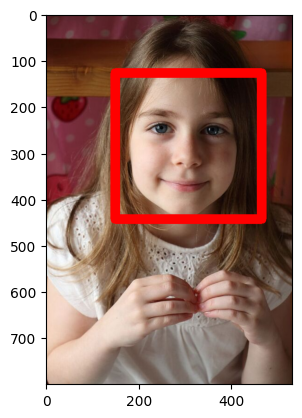

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# 케스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 앞과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴,  웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision/data/haarcascade_frontalface_alt.xml' # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환
# 밝은 부분은 흰색, 어두운 부분은 검은색, 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = '/content/drive/MyDrive/kdt_240424/m8_vision/data/girl1.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 (cascade.detectMultiScale() 메서드 사용)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 그레이스케일 이미지데이터, 얼굴 인식영역의 최소크기 지정

# 결과 확인
if len(face_list) == 0:
    print('얼굴인식 실패')
    quit()
# 인식한 부분 표시 # 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
    print('얼굴의 좌표 : ', x, y, w, h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)

# 이미지 출력
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/face-detect.png',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# mosaic.py
import cv2
# 축소 및 확대 과정을 통해 이미지의 특정 부분이 모자이크 처럼 흐릿해지는 효과
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대 : size를 n으로 설정하면, 원본이미지의 선택된 부분을 nxn 픽셀 크기로 축소한뒤, 이를 다시 원래의 크기로 확대
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA) # 보간법
    # 모자이크 적용
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

In [ ]:
# 모듈 업로드
!cp /content/drive/MyDrive/kdt_240424/m8_vision/data/mosaic.py /content

In [ ]:
!ls

drive  sample_data


In [ ]:
!pwd

/content


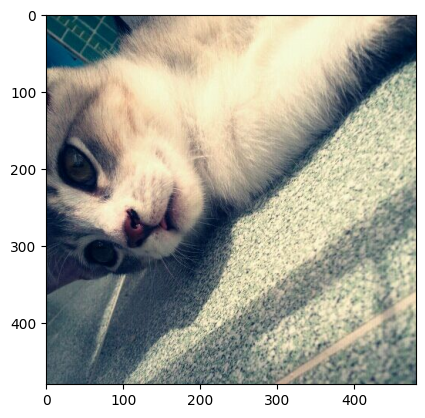

In [ ]:
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/cat.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

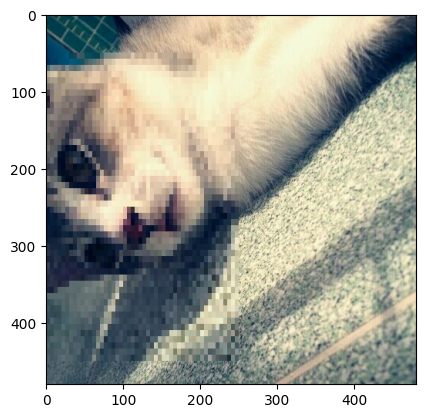

In [ ]:
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어들이고 모자이크 처리
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/cat.png')
mos = mosaic(img, (0, 50, 250, 450), 50)

# 이미지 출력
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/cat_mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

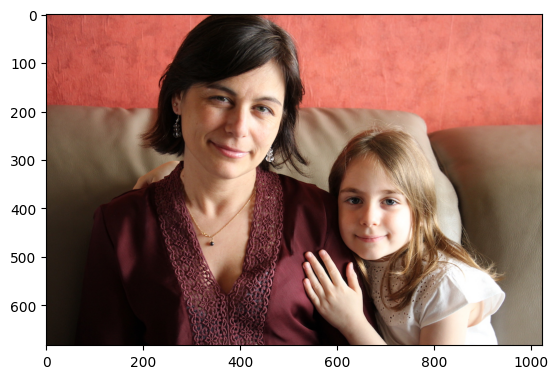

In [ ]:
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/family.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

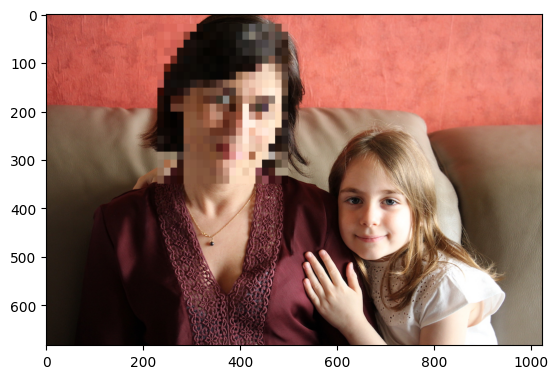

In [ ]:
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어들이고 모자이크 처리
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/family.jpg')
mos = mosaic(img, (230, 20, 500, 350), 20)

# 이미지 출력
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/family_mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()


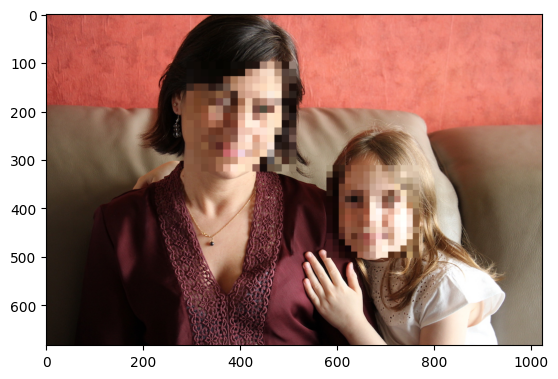

In [ ]:
# 사람 얼굴에 자동으로 모자이크 처리
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision/data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/family.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리
for (x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w,y+h), 15)

# 이미지 출력
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/family_mosaic1.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


Q. 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아서 모자이크 처리를 하세요.

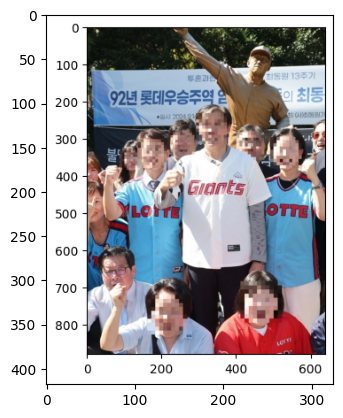

(418, 325, 3)

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/jogook.png')


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img.shape

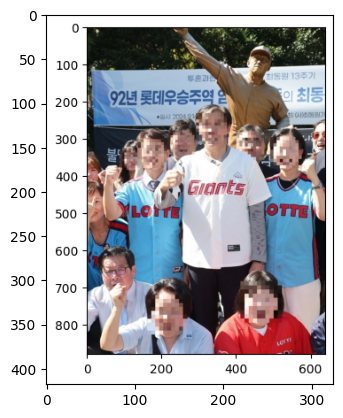

In [ ]:
# 사람 얼굴에 자동으로 모자이크 처리
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision/data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/jogook.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출
face_list = cascade.detectMultiScale(img_gray, minSize=(50,50))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리
for (x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w,y+h), 10)

# 이미지 출력
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision/data/jogook.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision/data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision/data/girl1.png')

# 얼굴 검출하고 영역 표시
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print('얼굴의 좌표 =', x, y, w, h)
        red = (0, 0, 255)

---0---
얼굴의 좌표: 135 109 352 352
---10---
얼굴의 좌표: 110 112 339 339
---20---
얼굴의 좌표: 88 117 335 335
---30---
---40---
---50---
---60---
---70---
---80---


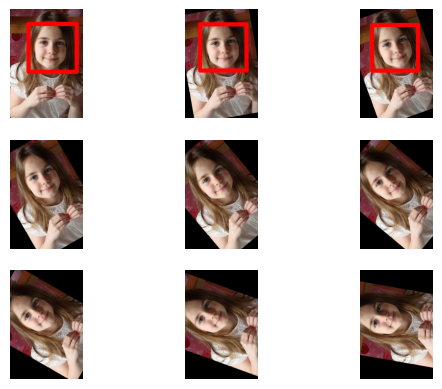

In [ ]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# Cascade 파일 경로
cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision/data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지 파일 경로
filepath = '/content/drive/MyDrive/kdt_240424/m8_vision/data/girl1.png'

# 이미지 읽기
img = cv2.imread(filepath)

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 그레이스케일 이미지로 변환
    face_list = cascade.detectMultiScale(img_gray, minSize=(300, 300))
    # 인식한 부분 표시하기
    for (x, y, w, h) in face_list:
        print("얼굴의 좌표:", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x + w, y + h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang, reshape=False)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()

OpenCV를 활용한 영상 처리
- OpenCV의 VideoCapture 클래스
  - 동영상을 개별 Frame으로 하나씩 읽어들이는 기능 제공
  - 생성 인자로 입력 video 파일 위치를 받아 생성
    - cap=cv2.VideoCapture(video_input_path)
  - 입력 video 파일의 다양한 속성 가져오기 가능
    - 영상 Frame 너비
    - cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    - 영상 Frame 높이
    - cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    - 영상 FPS(Frame Per Second)
    - cap.get(cv2.CAP_PROP_FPS)
  - read()는 마지막 Frame까지 차례로 Frame을 읽음
- VideoWriter
  - VideoCapture로 읽어들인 개별 Frame을 동영상 파일로 Write 수행
  - write할 동영상 파일 위치, Encoding 코덱 유형, write fps 수치, frame 크기를 생성자로 입력 받음
  - 이들 값에 따른 동영상 write 수행
  - write 시, 특정 포맷으로 동영상 Encoding 가능
    - DIVX, XVID, MJPG, X264, WMV1, WMV2

In [ ]:
!mkdir ./data
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2024-09-25 00:35:02--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/Night_Day_Chase.mp4 [following]
--2024-09-25 00:35:03--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/Night_Day_Chase.mp4 [following]
--2024-09-25 00:35:03--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubuserconten

In [ ]:
from google.colab import files

files.download('/content/data/Night_Day_Chase_output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# VideoCapture 객체와 VideoWriter 객체를 생성하고 frame의 갯수, FPS, video frame 크기의 정보를 읽어 출력
import cv2

video_input_path = '/content//data/Night_Day_Chase.mp4'
video_output_path = '/content/data/Night_Day_Chase_output.mp4'

# 비디오 파일이나 카메라 스트림으로부터 프레임을 캡처하기 위한 객체를 생성
cap = cv2.VideoCapture(video_input_path)
# cv2.VideoWriter_fourcc는 비디오 파일을 저장할 때 사용 할 코덱(codec)을 지정하는 데 사용되는 MPEG-4-문자 코드를 생성
# 'XVID'는 MPEG-4 코덱 중 하나를 나타내며, 널리 사용되는 비디오 압축 포맷 중 하나
codec = cv2.VideoWriter_fourcc(*'XVID')
# 비디오 프레임의 너비와 높이를 픽셀 단위로 가져옴
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
# 비디오 프레임 속도(Frames Per Second, FPS)를 가져옴
vid_fps = cap.get(cv2.CAP_PROP_FPS)
# 비디오 파일을 쓰기 위한 객체를 생성
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)
# 입력 비디오 파일의 총 프레임 수를 반환
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'총 Frame 갯수: {frame_cnt}  FPS: {round(vid_fps)}   Frame 크기: {vid_size}')

총 Frame 갯수: 1383  FPS: 28   Frame 크기: (1216, 516)


- 비디오를 프레임 단위로 읽고, 각 프레임에 사각형과 현재 프레임 번호를 텍스트로 추가한 후, 새로운 비디오 파일로 저장합니다.
- 처리 시간도 계산하여 출력합니다.
- 마지막으로 비디오 파일과 관련된 리소스를 해제합니다.

In [ ]:
import time

green_color=(0,255,0)
red_color=(0,0,255)

start = time.time()
index=0
# 프레임 하나씩 읽고 쓰기
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index +=1
    print(f"frame: {index} 처리완료")

    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = f'frame: {index}'
    # 각 프레임에 텍스트를 추가. 텍스트는 현재 프레임의 인덱스를 나타내며, (300,95는 텍스트가 위치할 좌표)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 1, red_color)

    vid_writer.write(img_frame)

print(f'write 완료 시간: {round(time.time() - start, 4)}초')
# 비디오 쓰기 객체와 비디오 캡처 객체를 해제
# 리소스를 정리하고, 새 비디오 파일의 쓰기를 완료한는 데 필요
cap.release()
vid_writer.release()

frame: 1 처리완료
frame: 2 처리완료
frame: 3 처리완료
frame: 4 처리완료
frame: 5 처리완료
frame: 6 처리완료
frame: 7 처리완료
frame: 8 처리완료
frame: 9 처리완료
frame: 10 처리완료
frame: 11 처리완료
frame: 12 처리완료
frame: 13 처리완료
frame: 14 처리완료
frame: 15 처리완료
frame: 16 처리완료
frame: 17 처리완료
frame: 18 처리완료
frame: 19 처리완료
frame: 20 처리완료
frame: 21 처리완료
frame: 22 처리완료
frame: 23 처리완료
frame: 24 처리완료
frame: 25 처리완료
frame: 26 처리완료
frame: 27 처리완료
frame: 28 처리완료
frame: 29 처리완료
frame: 30 처리완료
frame: 31 처리완료
frame: 32 처리완료
frame: 33 처리완료
frame: 34 처리완료
frame: 35 처리완료
frame: 36 처리완료
frame: 37 처리완료
frame: 38 처리완료
frame: 39 처리완료
frame: 40 처리완료
frame: 41 처리완료
frame: 42 처리완료
frame: 43 처리완료
frame: 44 처리완료
frame: 45 처리완료
frame: 46 처리완료
frame: 47 처리완료
frame: 48 처리완료
frame: 49 처리완료
frame: 50 처리완료
frame: 51 처리완료
frame: 52 처리완료
frame: 53 처리완료
frame: 54 처리완료
frame: 55 처리완료
frame: 56 처리완료
frame: 57 처리완료
frame: 58 처리완료
frame: 59 처리완료
frame: 60 처리완료
frame: 61 처리완료
frame: 62 처리완료
frame: 63 처리완료
frame: 64 처리완료
frame: 65 처리완료
frame: 66 처리완료
frame: 67 처리완료
fram

In [ ]:
from google.colab import files

# 비디오 파일을 로컬 시스템으로 다운로드
files.download('/content/data/Night_Day_Chase_output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import time

green_color=(0,255,0)
red_color=(0,0,255)


# VideoCapture 객체와 VideoWriter 객체를 생성하고 frame의 갯수, FPS, video frame 크기의 정보를 읽어 출력
import cv2

video_input_path = '/content//data/Night_Day_Chase.mp4'
video_output_path = '/content/data/Night_Day_Chase_output_face.mp4'

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'XVID')
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print(f'총 Frame 갯수: {frame_cnt}  FPS: {round(vid_fps)}   Frame 크기: {vid_size}')

# 얼굴 검출을 위한 Haar Cascade 로드(경로 + 파일)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

start = time.time()
index=0

# 프레임 하나씩 읽고 쓰기
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break

    # 프레임을 그레이스케일로 변환하여 얼굴 검출 수행
    gray = cv2.cvtColor(img_frame, cv2.COLOR_BGR2GRAY)
    # 얼굴 검출
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)     # 이미지 크기 조정 비율, 최소 이웃수

    # 검출된 얼굴 주위에 사각형 그리기
    for (x, y, w, h) in faces:
        cv2.rectangle(img_frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    index +=1
    print(f"frame: {index} 처리완료")
    vid_writer.write(img_frame)

print(f'write 완료 시간: {round(time.time() - start, 4)}초')
cap.release()
vid_writer.release()

frame: 1 처리완료
frame: 2 처리완료
frame: 3 처리완료
frame: 4 처리완료
frame: 5 처리완료
frame: 6 처리완료
frame: 7 처리완료
frame: 8 처리완료
frame: 9 처리완료
frame: 10 처리완료
frame: 11 처리완료
frame: 12 처리완료
frame: 13 처리완료
frame: 14 처리완료
frame: 15 처리완료
frame: 16 처리완료
frame: 17 처리완료
frame: 18 처리완료
frame: 19 처리완료
frame: 20 처리완료
frame: 21 처리완료
frame: 22 처리완료
frame: 23 처리완료
frame: 24 처리완료
frame: 25 처리완료
frame: 26 처리완료
frame: 27 처리완료
frame: 28 처리완료
frame: 29 처리완료
frame: 30 처리완료
frame: 31 처리완료
frame: 32 처리완료
frame: 33 처리완료
frame: 34 처리완료
frame: 35 처리완료
frame: 36 처리완료
frame: 37 처리완료
frame: 38 처리완료
frame: 39 처리완료
frame: 40 처리완료
frame: 41 처리완료
frame: 42 처리완료
frame: 43 처리완료
frame: 44 처리완료
frame: 45 처리완료
frame: 46 처리완료
frame: 47 처리완료
frame: 48 처리완료
frame: 49 처리완료
frame: 50 처리완료
frame: 51 처리완료
frame: 52 처리완료
frame: 53 처리완료
frame: 54 처리완료
frame: 55 처리완료
frame: 56 처리완료
frame: 57 처리완료
frame: 58 처리완료
frame: 59 처리완료
frame: 60 처리완료
frame: 61 처리완료
frame: 62 처리완료
frame: 63 처리완료
frame: 64 처리완료
frame: 65 처리완료
frame: 66 처리완료
frame: 67 처리완료
fram